In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 

In [3]:
!pip install xlrd
import xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 6.8 MB/s eta 0:00:00


In [4]:
datos_raw = pd.read_excel("vigilancia_kerma3Gy_macros.xls", sheet_name="Datos")
datos_raw.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,NaN,!! Enviar a Oscar solo los de Vascular,NaN,NaN,NaN,NaN,!! Cuando no esté cerrado el examen escribir e...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,Vigilancia de kerma,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Última fecha,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,PACS,Outlook,NaN,NaN,NaN,Eritrema en piel
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2022-07-31 00:00:00,---,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,Tipo de paciente,Apellido 1,Apellido 2,Nombre,SIP,Fecha de la dosis,Kerma en aire acumulada (Gy),Zona corporal,...,Fecha de nacimiento,Apuntado,Examen,Nombre completo,Mes,Año,Equipo,Kerma acumulado (Gy),NaN,NaN
7,NaN,NaN,Adulto,Torregrosa,Valero,M Carmen,4245699,2018-01-15 00:00:00,3.159,NaN,...,1955-09-22 00:00:00,Si,NaN,"Torregrosa Valero,M Carmen",1,2018,Vascular,2.756,NaN,NaN
8,NaN,NaN,Adulto,Cervera,Ruiz,Antonio,2932082,2018-02-26 00:00:00,4.17,abdomen,...,1958-01-11 00:00:00,Si,Quimioembolización hepática. Procedimiento básico,"Cervera Ruiz,Antonio",2,2018,Vascular,10.417,NaN,NaN
9,NaN,NaN,Adulto,Giner,Ortega,Francisca,2932156,2018-06-11 00:00:00,2.9,abdomen,...,1958-12-29 00:00:00,Si,Quimioembolización hepática. Procedimiento básico,"Giner Ortega,Francisca",6,2018,Vascular,3.71127,NaN,NaN


In [5]:
datos_raw.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28'],
      dtype='object')

In [6]:
datos_raw.rename(columns={'Unnamed: 2': 'Tipo',
                          'Unnamed: 3': 'Apellido 1',
                          'Unnamed: 4': 'Apellido 2',
                          'Unnamed: 5': 'Nombre',
                          'Unnamed: 6': 'SIP',
                          'Unnamed: 7': 'Fecha de dosis',
                          'Unnamed: 8': 'Kerma',
                          'Unnamed: 19': 'Fecha de nacimiento',
                          'Unnamed: 21': 'Examen',
                          'Unnamed: 25': 'Equipo',}, inplace=True)

In [7]:
datos_raw.drop(columns=['Unnamed: 0','Unnamed: 1','Unnamed: 9','Unnamed: 10',
                        'Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14',
                        'Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18',
                        'Unnamed: 20','Unnamed: 22','Unnamed: 23','Unnamed: 24',
                        'Unnamed: 26','Unnamed: 27','Unnamed: 28'], inplace=True)

In [8]:
datos_raw.drop([0,1,2,3,4,5,6],inplace=True)

In [9]:
df = datos_raw

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407 entries, 7 to 2435
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Tipo                 2405 non-null   object 
 1   Apellido 1           2406 non-null   object 
 2   Apellido 2           2294 non-null   object 
 3   Nombre               2406 non-null   object 
 4   SIP                  2406 non-null   object 
 5   Fecha de dosis       2406 non-null   object 
 6   Kerma                2380 non-null   float64
 7   Fecha de nacimiento  2406 non-null   object 
 8   Examen               2393 non-null   object 
 9   Equipo               2206 non-null   object 
dtypes: float64(1), object(9)
memory usage: 206.9+ KB


In [10]:
df[df['Examen']=='Cateterismo cardiaco']['Kerma']

1175    0.07443
1176     0.1356
1177    0.07326
1178    0.08627
1191    0.84342
         ...   
2429    0.49329
2431    1.34588
2432    0.53512
2433    0.78556
2434    0.29466
Name: Kerma, Length: 378, dtype: object

In [11]:
df['Kerma'].value_counts()

No tiene    9
0.00046     3
0.03        3
0.4         3
0.19        3
           ..
0.10873     1
0.87904     1
0.262       1
0.11385     1
0.5         1
Name: Kerma, Length: 2267, dtype: int64

In [12]:
df = df.drop(df[df['Kerma']=='No tiene'].index)

In [13]:
df = df.drop(df[df['Kerma']=='Falta mirarlo. No acceso'].index)
df = df.drop(df[df['Kerma']=='Sin datos'].index)
df = df.drop(df[df['Kerma']=='No hay'].index)
df = df.drop(df[df['Kerma']=='Imposible'].index)
df = df.drop(df[df['Kerma']=='Imposible'].index)
df = df.drop(df[df['Kerma']=='NO'].index)
df = df.drop(df[df['Kerma']=='XA_02'].index)
df = df.drop(df[df['Kerma']=='XA_04'].index)
df = df.drop(df[df['Kerma']=='XA_05'].index)
df = df.drop(df[df['Kerma']=='XA_07'].index)

In [14]:
df.loc[[1877]]

,Tipo,Apellido 1,Apellido 2,Nombre,SIP,Fecha de dosis,Kerma,Fecha de nacimiento,Examen,Equipo
1877,Adulto,Fernandez,Lozano,Angeles,2147684,2022-06-07 00:00:00,07:15:59.328000,1966-05-26 00:00:00,Cateterismo cardiaco,Hemodinámica


In [15]:
df.drop(df.iloc[1857].name,inplace=True)

In [16]:
df['Kerma'] = df['Kerma'].astype(float)

In [17]:
df[df['Kerma'] == df['Kerma'].max()]

,Tipo,Apellido 1,Apellido 2,Nombre,SIP,Fecha de dosis,Kerma,Fecha de nacimiento,Examen,Equipo
917,Adulto,Martinez,Garcia,Carmen,2876248,2022-01-22 00:00:00,309957.0,1957-02-24 00:00:00,Otras arteriografias,Vascular


In [18]:
df.drop(df.loc[917].name,inplace=True)

In [19]:
df[df['Kerma'] == df['Kerma'].max()]

,Tipo,Apellido 1,Apellido 2,Nombre,SIP,Fecha de dosis,Kerma,Fecha de nacimiento,Examen,Equipo
1967,Pediátrico,Aguayo,Guiterrez,Josue,6671279,2022-06-15 00:00:00,139.48,2005-03-08 00:00:00,Cateterismo cardiaco,Hemodinámica


In [20]:
df.loc[1967,'Kerma'] = 0.13948

In [21]:
df.loc[353,'Kerma'] = 0.04871

In [22]:
df.loc[361,'Kerma'] = 0.02346

In [23]:
df.drop(df.loc[12].name,inplace=True)

In [24]:
df[df['Kerma'] == df['Kerma'].max()]

,Tipo,Apellido 1,Apellido 2,Nombre,SIP,Fecha de dosis,Kerma,Fecha de nacimiento,Examen,Equipo
45,Adulto,Nadal,Torralbo,David,4664774,2020-07-16 00:00:00,7.469,1970-07-14 00:00:00,Arteriografía troncos viscerales digestivos,Vascular


/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0,0.5,'Frecuencia')

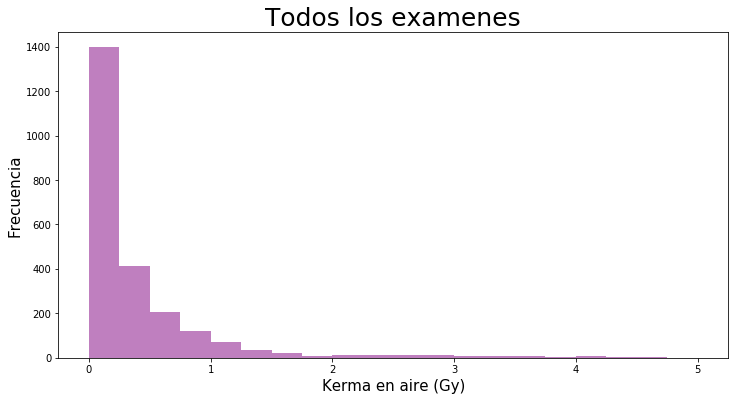

In [25]:
plt.figure(figsize=(12, 6))
plt.subplot(111)
plt.hist(df['Kerma'],color='purple', alpha=0.5, range=(0,5),bins=20)
plt.title('Todos los examenes',fontsize=25)
plt.xlabel('Kerma en aire (Gy)', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)

In [26]:
df_cateterismo = df[df['Examen']=='Cateterismo cardiaco']

Text(0,0.5,'Frecuencia')

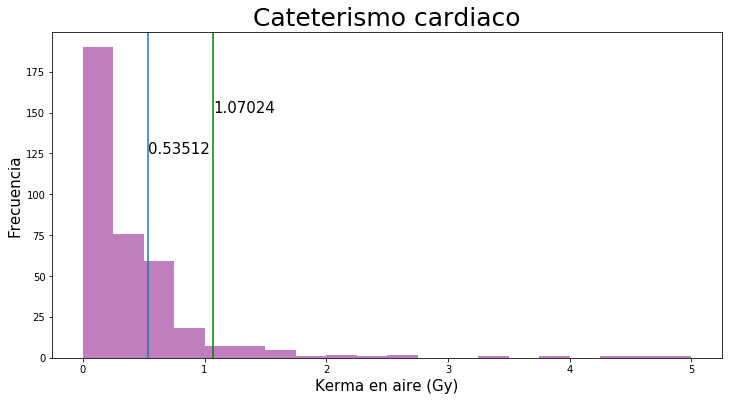

In [27]:
tercer_cuartil = df_cateterismo['Kerma'].quantile(0.75)

plt.figure(figsize=(12, 6))
plt.subplot(111)
plt.hist(df_cateterismo['Kerma'],color='purple', alpha=0.5, range=(0,5),bins=20)

plt.axvline(x=tercer_cuartil)
plt.annotate(tercer_cuartil, xy=(tercer_cuartil, 125),fontsize=15) 

plt.axvline(x=tercer_cuartil*2,color='green')
plt.annotate(tercer_cuartil*2, xy=(tercer_cuartil*2, 150),fontsize=15) 

plt.title('Cateterismo cardiaco',fontsize=25)
plt.xlabel('Kerma en aire (Gy)', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)

In [28]:
len(df_cateterismo[df_cateterismo['Kerma']>tercer_cuartil*2])/len(df_cateterismo)*100

7.506702412868632

In [29]:
len(df_cateterismo[df_cateterismo['Kerma']>3])/len(df_cateterismo)*100

1.3404825737265416

In [30]:
len(df_cateterismo)

373

# Limpieza

In [110]:
df[50:100]

,Tipo,Apellido 1,Apellido 2,Nombre,SIP,Fecha de dosis,Kerma,Fecha de nacimiento,Examen,Equipo
58,Adulto,Llanes,Tolosa,Ramón,1698821,2020-09-18 00:00:00,3.00200,1965-08-17 00:00:00,Quimioembolización hepática. Procedimiento básico,Vascular
59,Adulto,Arocha,Mejías,Caridad María,12557556,2020-09-23 00:00:00,1.37600,1956-06-17 00:00:00,NaN,Vascular
60,Adulto,Arocha,Mejías,Caridad María,12557556,2020-09-24 00:00:00,3.71800,1956-06-17 00:00:00,Arteriografía miembros inferiores,Vascular
61,Adulto,Villar,Marín,José,2484685,2020-10-01 00:00:00,5.50000,1947-07-21 00:00:00,Quimioembolización hepática. Procedimiento básico,Vascular
62,Adulto,Jiménez,Navarro,Milagros,3395822,2020-10-06 00:00:00,2.77300,1980-11-29 00:00:00,Embolización bronquial. Procedimiento básico,Vascular
63,Adulto,Gonzalez,Climent,Javier,4724594,2020-10-07 00:00:00,6.14600,1961-07-13 00:00:00,Quimioembolización hepática. Procedimiento básico,Vascular
64,Adulto,Giner,Ortega,Francisca,2932156,2020-10-07 00:00:00,0.97600,1958-12-29 00:00:00,3061080110001370,Vascular
65,Adulto,Soler,Juan,Joaquín,1900685,2020-10-15 00:00:00,2.89200,1951-12-11 00:00:00,Infusión terapéutica quimioterapia. Procedimie...,Vascular
66,Adulto,Fengying,NaN,Zheng,12301367,2020-10-15 00:00:00,0.62300,1965-06-12 00:00:00,3061080105041010,Vascular
67,Adulto,Orallo,Álvarez,Florentina,3386511,2020-10-16 00:00:00,4.20600,1936-12-31 00:00:00,Embolización renal. Procedimiento básico,Vascular


In [134]:
df.drop(df.index[0:77],inplace=True)

In [135]:
df['Examen'].unique()

array(['Embolización bronquial. Procedimiento básico',
       'Colocación de cáteter central con tracto subcutáneo',
       'Tratamiento estenosis oclusiva otras arterias',
       'Cateterismo cardíaco pediátrico',
       'Quimioembolización hepática. Procedimiento básico',
       'Embo otras hemorrajs proc basic', 'Embo hepatica proc basic',
       'Estudio de fístula arteriovenosa hemodialisis',
       'Embolización de hemorragia digestiva baja: Procedimiento básico',
       'Embolización de hemorragia digestiva baja. Procedimiento básico',
       'Cateterismo cardiaco pediatrico', 'Dilatación biliar hepática',
       'Arteriografía troncos viscerales digestivos', nan,
       'Embolización renal. Procedimiento básico',
       'Colocación cateter central con tracto subcutaneo + tto endov esten oclu cava sup (no imagenes)',
       'Otro intervencionismo de diagnóstico de tórax',
       'Embolización de miomas uterinos: Procedimiento básico',
       'Filtro de cava', 'Cateterismo cardia

In [136]:
df[df['Examen'].str.startswith('Catet').fillna(False)]['Examen'].unique()

array(['Cateterismo cardíaco pediátrico',
       'Cateterismo cardiaco pediatrico', 'Cateterismo cardiaco',
       'Cateterización retrograda catéter J',
       'Cateterización retrograda catéter doble J'], dtype=object)

In [137]:
(df['Examen']=='Cateterismo cardíaco').value_counts()

False    2330
Name: Examen, dtype: int64

In [138]:
df[df['Examen']=='Cateterismo cardíaco']['Examen']

Series([], Name: Examen, dtype: object)

In [139]:
df.loc[df.Examen == 'Cateterismo cardíaco', 'Examen'] = "Cateterismo cardiaco"

In [140]:
df_cateterismo = df[df['Examen']=='Cateterismo cardiaco']

Text(0,0.5,'Frecuencia')

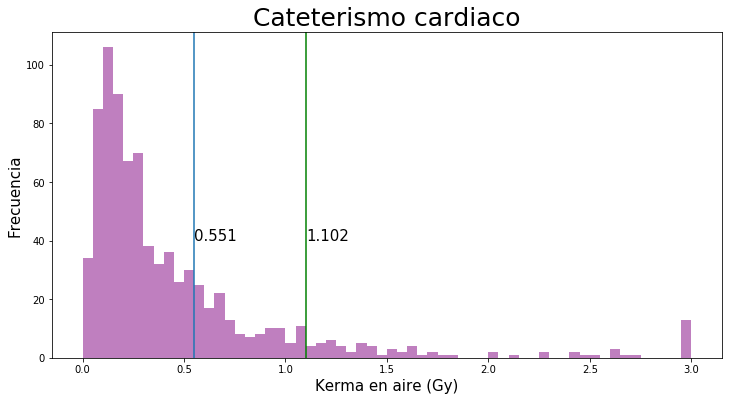

In [141]:
tercer_cuartil = df_cateterismo['Kerma'].quantile(0.75)

plt.figure(figsize=(12, 6))
plt.subplot(111)

bins = np.arange(0,3.001,0.05)

plt.hist(np.clip(df_cateterismo['Kerma'], bins[0], bins[-1]), bins=bins,color='purple', alpha=0.5)

plt.axvline(x=tercer_cuartil)
plt.annotate(np.round(tercer_cuartil,3), xy=(tercer_cuartil, 40),fontsize=15) 

plt.axvline(x=tercer_cuartil*2,color='green')
plt.annotate(np.round(tercer_cuartil*2,3), xy=(tercer_cuartil*2, 40),fontsize=15) 

plt.title('Cateterismo cardiaco',fontsize=25)
plt.xlabel('Kerma en aire (Gy)', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)

In [142]:
print(len(df_cateterismo))
print(np.round(df_cateterismo['Kerma'].mean(),3))
print(np.round(df_cateterismo['Kerma'].std(),3))
print(np.round(df_cateterismo['Kerma'].max(),3))

845
0.477
0.641
5.871


In [143]:
df['Equipo'].value_counts()

Vascular               1159
Hemodinámica            805
Electrofisiología       159
NHFE_USCA_100             3
NFHE_USCA_100             2
Neurología Vascular       1
Name: Equipo, dtype: int64

In [144]:
df_vascular = df[df['Equipo']=='Vascular']
df_hemodinamica = df[df['Equipo']=='Hemodinámica']
df_electrofisiologia = df[df['Equipo']=='Electrofisiología']

Text(0,0.5,'Frecuencia')

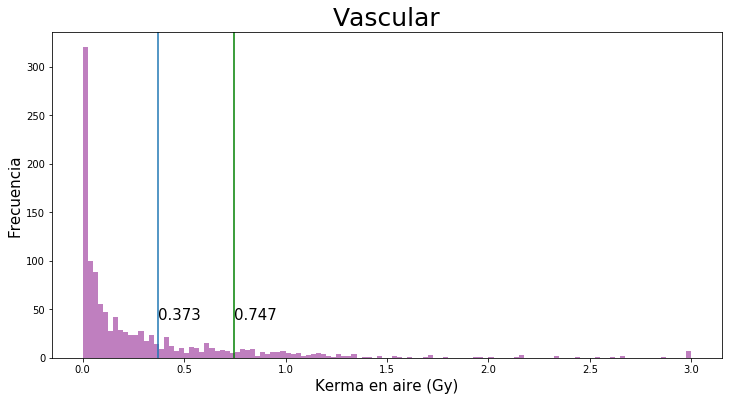

In [145]:
tercer_cuartil = df_vascular['Kerma'].quantile(0.75)

plt.figure(figsize=(12, 6))
plt.subplot(111)

bins = np.arange(0,3.001,0.025)

plt.hist(np.clip(df_vascular['Kerma'], bins[0], bins[-1]), bins=bins,color='purple', alpha=0.5)

plt.axvline(x=tercer_cuartil)
plt.annotate(np.round(tercer_cuartil,3), xy=(tercer_cuartil, 40),fontsize=15) 

plt.axvline(x=tercer_cuartil*2,color='green')
plt.annotate(np.round(tercer_cuartil*2,3), xy=(tercer_cuartil*2, 40),fontsize=15) 

plt.title('Vascular',fontsize=25)
plt.xlabel('Kerma en aire (Gy)', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)

Text(0,0.5,'Frecuencia')

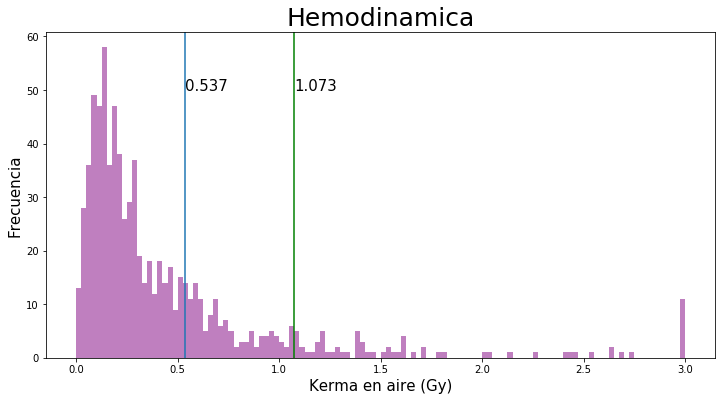

In [146]:
tercer_cuartil = df_hemodinamica['Kerma'].quantile(0.75)

plt.figure(figsize=(12, 6))
plt.subplot(111)

bins = np.arange(0,3.001,0.025)

plt.hist(np.clip(df_hemodinamica['Kerma'], bins[0], bins[-1]), bins=bins,color='purple', alpha=0.5)

plt.axvline(x=tercer_cuartil)
plt.annotate(np.round(tercer_cuartil,3), xy=(tercer_cuartil, 50),fontsize=15) 

plt.axvline(x=tercer_cuartil*2,color='green')
plt.annotate(np.round(tercer_cuartil*2,3), xy=(tercer_cuartil*2, 50),fontsize=15) 

plt.title('Hemodinamica',fontsize=25)
plt.xlabel('Kerma en aire (Gy)', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)

Text(0,0.5,'Frecuencia')

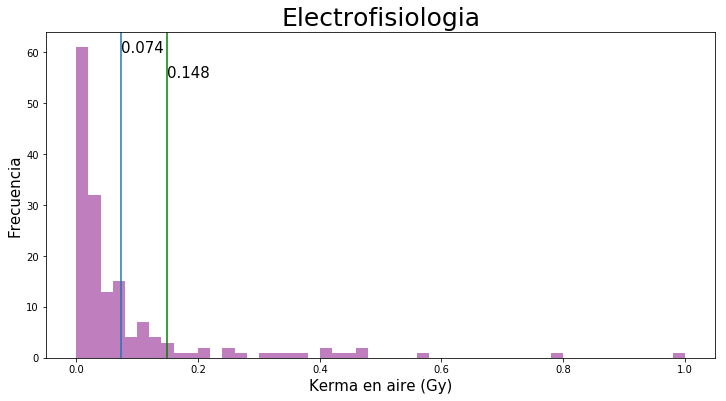

In [149]:
tercer_cuartil = df_electrofisiologia['Kerma'].quantile(0.75)

plt.figure(figsize=(12, 6))
plt.subplot(111)

bins = np.arange(0,1.001,0.02)

plt.hist(np.clip(df_electrofisiologia['Kerma'], bins[0], bins[-1]), bins=bins,color='purple', alpha=0.5)

plt.axvline(x=tercer_cuartil)
plt.annotate(np.round(tercer_cuartil,3), xy=(tercer_cuartil, 60),fontsize=15) 

plt.axvline(x=tercer_cuartil*2,color='green')
plt.annotate(np.round(tercer_cuartil*2,3), xy=(tercer_cuartil*2, 55),fontsize=15) 

plt.title('Electrofisiologia',fontsize=25)
plt.xlabel('Kerma en aire (Gy)', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)

In [151]:
df.head()

,Tipo,Apellido 1,Apellido 2,Nombre,SIP,Fecha de dosis,Kerma,Fecha de nacimiento,Examen,Equipo
85,Adulto,Jiménez,Navarro,Milagros,3395822,2021-01-08 00:00:00,0.078,1980-11-29 00:00:00,Embolización bronquial. Procedimiento básico,Vascular
86,Adulto,Blasco,Calatayud,Josefa,2316361,2021-01-29 00:00:00,0.012,1959-01-04 00:00:00,Colocación de cáteter central con tracto subcu...,Vascular
87,Adulto,Vicent,Roig,Elvira,4343935,2021-02-01 00:00:00,2.858,1943-04-02 00:00:00,Tratamiento estenosis oclusiva otras arterias,Vascular
88,Pediátrico,Saiz,Amorós,Francis,12615325,2021-02-03 00:00:00,0.031,2019-05-15 00:00:00,Cateterismo cardíaco pediátrico,Hemodinámica
89,Adulto,Giner,Ortega,Francisca,2932156,2021-02-03 00:00:00,0.800,1958-12-29 00:00:00,Quimioembolización hepática. Procedimiento básico,Vascular
